<h1 align="center">Classifying MNIST digits using Keras </h1>

## Introduction

The `MNIST` dataset is a famous dataset of several thousand samples of handwritten digits, each of which is encoded in a low resolution image of 28*28 pixels. There are 10 possible digits from 0 to 9. The objective of this study is to try out several Neural Networks (Multi Layered Perceptrons) that classify the digits with high accuracy.

The library I'll be using is `Keras` which is a high level deep learning framework and API. The backend used will be `Tensorflow`.

Let's begin by importing the requied libraries.

In [50]:
from keras.datasets import mnist
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib import rcParams
import time
from keras.initializers import RandomNormal, glorot_normal, he_normal
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

Specify the plotting parameters.

In [51]:
rcParams['figure.figsize'] = (14.5,5)

### Function to plot Validation loss vs Test loss

In [52]:
def plot_loss(x, vy, ty, title):
    plt.plot(x, vy, 'b', label="Validation Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('Categorical Crossentropy Loss')
    plt.legend()
    plt.grid()
    
    plt.show()

Load the MNIST data. It comes with the installation of Keras.

In [53]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Dimensions of the data

In [54]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In the above 3-dimensional tensor, each digit is stored as a 2-dimensional vector of shape `28*28`

In [55]:
X_train[0].shape

(28, 28)

### Sample images of digits

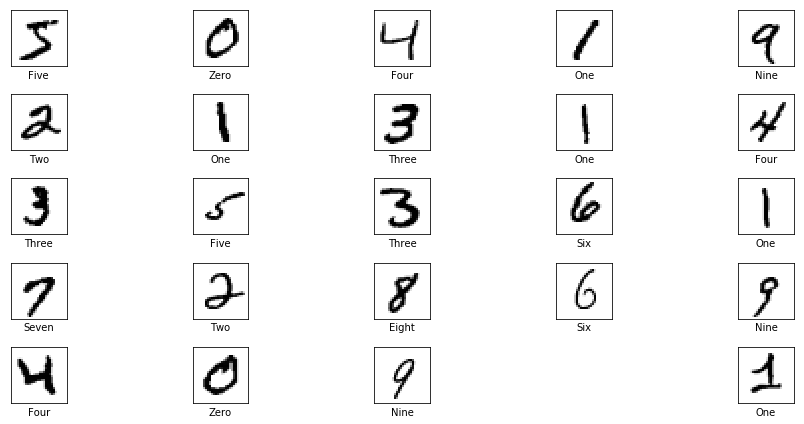

In [56]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

plt.figure(figsize=(14,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.tight_layout()

### Flatten 2D image into a 1D array

In [57]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

Shape of the new vectors

In [58]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


## Normalize the array values

Each cell is having a value between 0-255. Before we move to apply machine learning algorithms lets try to normalize the data

    X => (X - Xmin)/(Xmax-Xmin) = X/255


In [59]:
X_train = X_train / 255
X_test = X_test / 255

### Convert target variable

The target variable by contains the actual value of the digit. We need to convert it into a form that's suitable for a neural network output. Let's convert each output into a 10 dimensional binary array. 

In [60]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

Class label of first image : 5


In [61]:
print("After converting the output into a vector : ",y_train[3])

After converting the output into a vector :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Define common model parameters

In [62]:
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

## Model 1: Two hidden layers of neurons 

[ 784 - 256 - BN - DO -128 - BN - DO - 10 ]

In the architecture above, 

        BN: Batch Normalization Layer
        DO: DropOut Layer
        
Let's define the model step by step.

In [63]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

Compile the model

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the neural network.

In [65]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.5829 - acc: 0.8205 - val_loss: 0.1895 - val_acc: 0.9412
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3009 - acc: 0.9093 - val_loss: 0.1467 - val_acc: 0.9552
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2443 - acc: 0.9267 - val_loss: 0.1250 - val_acc: 0.9607
Epoch 4/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2103 - acc: 0.9349 - val_loss: 0.1119 - val_acc: 0.9664
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1917 - acc: 0.9415 - val_loss: 0.1031 - val_acc: 0.9686
Epoch 6/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.1732 - acc: 0.9474 - val_loss: 0.0942 - val_acc: 0.9717
Epoch 7/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1638 - acc: 0.9506 - val_loss: 0.0931 - val_

### Validation vs Test loss

Test score: 0.07196902272452135
Test accuracy: 0.9788


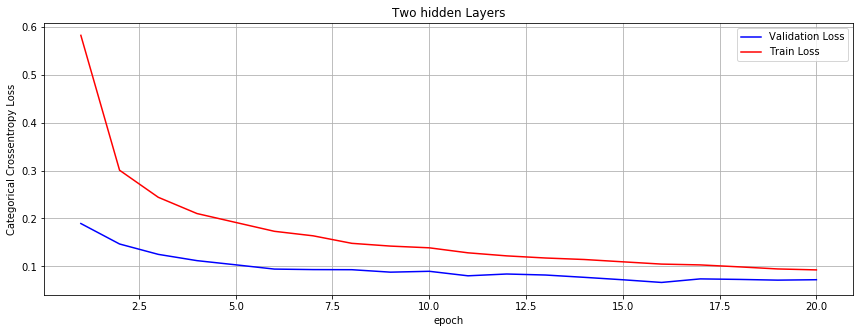

In [66]:
score = model.evaluate(X_test, y_test, verbose=False) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty, title='Two hidden Layers')

In [67]:
score = model.evaluate(X_train, y_train, verbose=False)
print('Train accuracy:', score[1])

Train accuracy: 0.9910833333333333


In [82]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ['#', 'Architecture', 'Train Accuracy', 'Test Accuracy']
table.add_row(['1', '784-256-BN-DO-128-BN-DO-10', '0.99108', '0.9788' ])

## Model 2: Three hidden layers of Neurons

[ 784 - 256 - BN - DO -128 - BN - DO - 64 - BN - DO - 10] 

As we did above, we'll define this architecture step by step, compile the model, and then train it.

In [69]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
__________

Compile and Train

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142us/step - loss: 1.0175 - acc: 0.6798 - val_loss: 0.2661 - val_acc: 0.9240
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.4789 - acc: 0.8587 - val_loss: 0.1960 - val_acc: 0.9411
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.3772 - acc: 0.8909 - val_loss: 0.1634 - val_acc: 0.9505
Epoch 4/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.3176 - acc: 0.9107 - val_loss: 0.1531 - val_acc: 0.9533
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2815 - acc: 0.9200 - val_loss: 0.1272 - val_acc: 0.9612
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2514 - acc: 0.9288 - val_loss: 0.1281 - val_acc: 0.9622
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2324 - acc: 0.9345 - val_loss: 0.1127 - 

### Validation vs Test Loss

Test score: 0.08227364041905384
Test accuracy: 0.9774


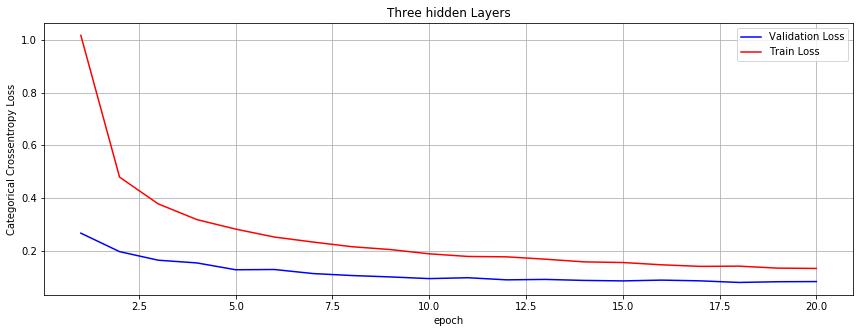

In [71]:
score = model.evaluate(X_test, y_test, verbose=False) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty, title='Three hidden Layers')

In [72]:
score = model.evaluate(X_train, y_train, verbose=False)
print('Train accuracy:', score[1])

Train accuracy: 0.98695


In [83]:
table.add_row(['2', '784-256-BN-DO-128-BN-DO-64-BN-DO-10', '0.98695', '0.9774' ])

## Model 3: Five hidden Layers of Neurons

[784-512-BN-DO-256-BN-DO-128-BN-DO-64-BN-DO-32-BN-DO-10] 

In [74]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
__________

Compile and Train the model

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 270us/step - loss: 1.9314 - acc: 0.3434 - val_loss: 0.7666 - val_acc: 0.8411
Epoch 2/20
60000/60000 [==============================] - 14s 240us/step - loss: 1.0538 - acc: 0.6385 - val_loss: 0.4167 - val_acc: 0.8931
Epoch 3/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.7422 - acc: 0.7617 - val_loss: 0.2827 - val_acc: 0.9246
Epoch 4/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.5902 - acc: 0.8231 - val_loss: 0.2151 - val_acc: 0.9404
Epoch 5/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.4889 - acc: 0.8589 - val_loss: 0.1819 - val_acc: 0.9497
Epoch 6/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.4294 - acc: 0.8828 - val_loss: 0.1673 - val_acc: 0.9546
Epoch 7/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.3765 - acc: 0.9003 - val_loss: 0.

### Validation vs Test loss 

Test score: 0.09940273783607409
Test accuracy: 0.9779


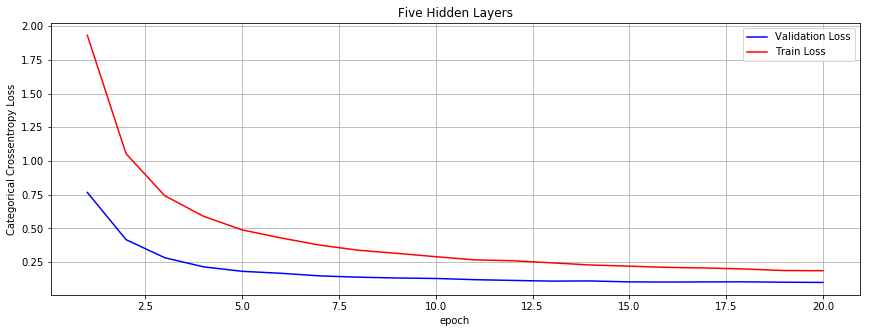

In [76]:
score = model.evaluate(X_test, y_test, verbose=False) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty, title='Five Hidden Layers')

In [77]:
score = model.evaluate(X_train, y_train, verbose=False)
print('Train accuracy:', score[1])

Train accuracy: 0.9875833333333334


In [84]:
table.add_row(['3', '784-512-BN-DO-256-BN-DO-128-BN-DO-64-BN-DO-32-BN-DO-10', '0.9875', '0.9779' ])

# Conclusion:

* We tried 3 different MLP architectures for classifying the classic MNIST digits dataset. The number of neurons used in each layer were:
    
        1. 256-128 (2 hidden layers)
        2. 256-128-64 (3 hidden layers)
        3. 512-256-128-64-32 (5 hidden layers)
    
    Batch normalization and Dropouts were also used.
* We found that the simple 2 layered MLP performed the best and increasing the complexity of the model does not always mean that the results obtained will be better too. You can find the summary of this study below.  

In [85]:
print(table)

+---+--------------------------------------------------------+----------------+---------------+
| # |                      Architecture                      | Train Accuracy | Test Accuracy |
+---+--------------------------------------------------------+----------------+---------------+
| 1 |               784-256-BN-DO-128-BN-DO-10               |    0.99108     |     0.9788    |
| 2 |          784-256-BN-DO-128-BN-DO-64-BN-DO-10           |    0.98695     |     0.9774    |
| 3 | 784-512-BN-DO-256-BN-DO-128-BN-DO-64-BN-DO-32-BN-DO-10 |     0.9875     |     0.9779    |
+---+--------------------------------------------------------+----------------+---------------+
